In [1]:
import mbil

In [2]:
from mbil import dataset

In [3]:
from mbil import scores

In [4]:
from mbil import mbilsearch

In [5]:
from mbil import mbilscore

In [6]:
from mbil import output

In [7]:
dataset_input_directory="C:/Users/CHX37/PycharmProjects/MBIL/datasets/TEST.txt"
#dataset_input_directory="/Users/xij6/Documents/Research/git/XiaJiang-2Github/MBIL/datasets/TEST.txt"
alpha = 4
target = "E"
top = 20
max_single_predictors = 20
max_interaction_predictors = 20
max_size_interaction = 3
threshold = 0.05
maximum_number_of_parents=7

In [8]:
dataset_df = dataset.ReadDataset(file=dataset_input_directory, sep='\t').dataset_df

In [9]:
score_test_obj = mbilscore.mbilscore(dataset_df=dataset_df, target=target, alpha = alpha)

In [10]:
search_test_object = mbilsearch.mbilsearch(threshold=threshold,
                                           max_single_predictors= max_single_predictors,
                                           max_interaction_predictors=max_interaction_predictors,
                                           max_size_interaction= max_size_interaction,
                                           dataset_df = dataset_df,
                                           alpha = alpha,
                                           target = target)



In [11]:
direct_cause_obj = mbilsearch.directCause(
    new_dataset = search_test_object.transformed_dataset,
    alpha= alpha,
    target = target,
    maximum_number_of_parents = maximum_number_of_parents)

In [12]:
output_path = "output/"
dataset_name = "Test"

In [13]:
all_input_hash_map = {"alpha": alpha,
                      "target":target, 
                      "top":top, 
                      "max_single_predictors":max_single_predictors, 
                      "max_interaction_predictors":max_interaction_predictors,
                      "max_size_interaction":max_size_interaction, 
                      "threshold":threshold, 
                      "maximum_number_of_parents":maximum_number_of_parents}

In [14]:
number_of_predictors = dataset_df.shape[1] - 1
number_of_records = dataset_df.shape[0]
dataset_information = {"number_of_predictors":number_of_predictors, "number_of_records":number_of_records}

In [15]:
output_object = output.output(
                           output_path = output_path,
                           dataset_name = dataset_name , 
                           all_input = all_input_hash_map, 
                           dataset_path = dataset_input_directory, 
                           dataset_information = dataset_information, 
                           null_score = score_test_obj.calculate_score(top = top, subset_size = 0), 
                           single_score = search_test_object.single_list_score, 
                           interaction_score = search_test_object.interaction_list_score, 
                           direc_cause = direct_cause_obj.direc_cause)

## score_test_obj

### 1. calculate_score(top = top, subset_size = "what subset size you want")

In [16]:
null_score = score_test_obj.calculate_score(top = top, subset_size = 0)

In [17]:
null_score

[('[]', -3.8430301339411947)]

In [18]:
score_subsetsize2 = score_test_obj.calculate_score(top = top, subset_size = 2)

In [19]:
score_subsetsize2

[("['B', 'C']", -3.753417975251508),
 ("['B', 'F']", -4.158883083359674),
 ("['B', 'D']", -4.382026634673884),
 ("['C', 'D']", -4.382026634673884),
 ("['D', 'F']", -4.382026634673884),
 ("['C', 'F']", -4.85203026391962)]

### 2. calculate_information_gain (top = top, subset_size = "what subset size you want")

In [20]:
null_information_gain = score_test_obj.calculate_information_gain(top = top, subset_size = 0)

In [21]:
null_information_gain

[('[]', 1)]

In [22]:
information_gain_subsetsize2 = score_test_obj.calculate_information_gain(top = top, subset_size = 2)

In [23]:
information_gain_subsetsize2

[("['D', 'F']", 0.5709505944546686),
 ("['B', 'C']", 0.5709505944546684),
 ("['B', 'F']", 0.5709505944546684),
 ("['C', 'D']", 0.5709505944546684),
 ("['B', 'D']", 0.4199730940219749),
 ("['C', 'F']", 0.17095059445466854)]

### 3. plot bar graph with score result

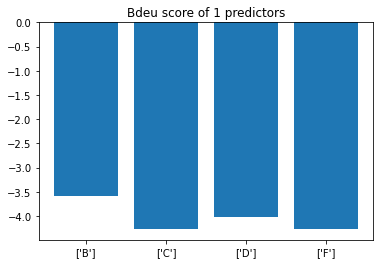

In [24]:
score_test_obj.plot_score(subset_size = 1)

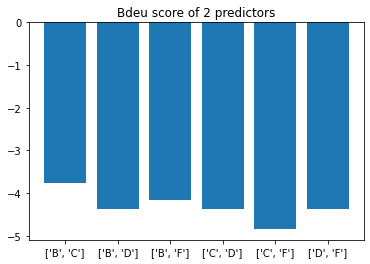

In [25]:
score_test_obj.plot_score(subset_size = 2)

### 4. plot bar graph with information gain result

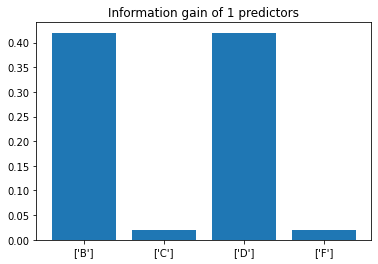

In [26]:
score_test_obj.plot_information_gain(subset_size = 1)

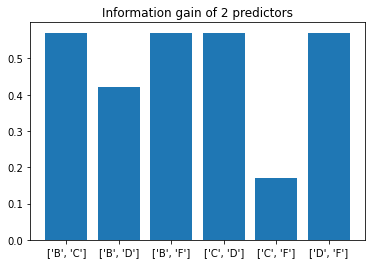

In [27]:
score_test_obj.plot_information_gain(subset_size = 2)

## search_test_object

### 1. Print single_predictor list after search

In [28]:
## don't need to output to csv file
single_list = search_test_object.single_list_score

In [29]:
single_list

[('B', -3.5835189384561104)]

### 1. Print transformed dataset

In [30]:
search_test_object.transformed_dataset

,B,"['B', 'C']","['B', 'F']","['C', 'D']","['D', 'F']","['C', 'F']",E
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,2,2,2,2,2,0
3,1,2,2,2,2,2,1
4,0,0,3,3,3,1,0


## direc_cause_object

## output_object

In [31]:
output_object.output_log(output_path = "output/")

Put log file in output/ successfully


In [32]:
output_object.output_single_predictors(output_path = "output/" )

Put single nodes file in output/ successfully


In [33]:
output_object.output_interaction_predictors(output_path = "output/" )

Put interaction nodes file in output/ successfully


In [34]:
output_object.output_direct_cause(output_path = "output/" )

Put direct cause file in output/ successfully
